In [1]:
import sys
import os
import pandas as pd

current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(os.path.join(parent_dir, 'scripts'))

import data_acquisition
import Dataframe
import feature_engineering
import Advanced_model
#import regression

Set API key

In [2]:
os.environ['api_key'] = 'Bgx9192SVK3nzJNLQcV5nneQS'
os.environ['COMET_API_KEY'] = 'Bgx9192SVK3nzJNLQcV5nneQS'

# Collecting Data

In [3]:
data_acquisition.collect_data()

The folder '../data/raw/2016_2017' already exists.
The folder '../data/raw/2017_2018' already exists.
The folder '../data/raw/2018_2019' already exists.
The folder '../data/raw/2019_2020' already exists.
The folder '../data/raw/2020_2021' already exists.


# Cleaning Data

In [4]:
## environ 2 minutes
base_path = '../data/raw/'
df = Dataframe.load_all_seasons(base_path)
transformed_df = Dataframe.transformEventData(df)

Seasons: 100%|██████████| 5/5 [01:18<00:00, 15.69s/it]               


# 2. Ingenierie des caracteristiques I

In [5]:
# Charger les données
data = pd.read_csv('../data/derivatives/dataframe.csv')
# Créer les nouvelles caractéristiques
feature_engineering.create_features1(data, '^201[6-9]02\d{4}$', 'features_train1.csv')

# 3. Modele de base

# 4. Ingenierie des caracteristiques II

In [6]:
transformed_df = feature_engineering.transformEventData(df)
transformed_df.to_csv('../data/derivatives/dataframe_milestone_2.csv', index=False)

In [7]:
dataframe_milestone_1 = pd.read_csv('../data/derivatives/dataframe.csv')
dataframe_milestone_2 = pd.read_csv('../data/derivatives/dataframe_milestone_2.csv')

data = feature_engineering.create_features2(dataframe_milestone_2,dataframe_milestone_1, pattern='^201[6-9]02\d{4}$')
data.to_csv('../data/derivatives/dataframe_milestone_2.csv', index=False)

## fusion des features de ingénierie des caractéristiques 1 et 2
engineering1 = pd.read_csv('../data/derivatives/features_train1.csv')
engineering2 = pd.read_csv('../data/derivatives/dataframe_milestone_2.csv')

data_final_train = feature_engineering.fusion_features(engineering1, engineering2)
data_final_train.to_csv('../data/derivatives/train_data.csv', index=False)

D:\UdeM\Automne2023\IFT6758-DataScience\Projet\ift6758-A08\scripts\feature_engineering.py:61: RuntimeWarning: divide by zero encountered in scalar divide
  angle = np.arctan((y_goal - y)/(x_goal - np.abs(x)))
D:\UdeM\Automne2023\IFT6758-DataScience\Projet\ift6758-A08\scripts\feature_engineering.py:61: RuntimeWarning: invalid value encountered in scalar divide
  angle = np.arctan((y_goal - y)/(x_goal - np.abs(x)))


In [8]:
# Question 5 :
feature_engineering.comet_log_dataframe_profile()

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/me-pic/milestone-2/fe95fae06fdf4e08bc6bf52eae672f58

COMET WARNING: pandas_profiling is required to log profile; ignoring
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/me-pic/milestone-2/fe95fae06fdf4e08bc6bf52eae672f58
COMET INFO:   Others:
COMET INFO:     Name : Dataframe
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 

# 5. Advanced Model

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/me-pic/milestone-2/3b423240e73548279658134f3d21baad

C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dt

ROC AUC Score: 0.578754708834128


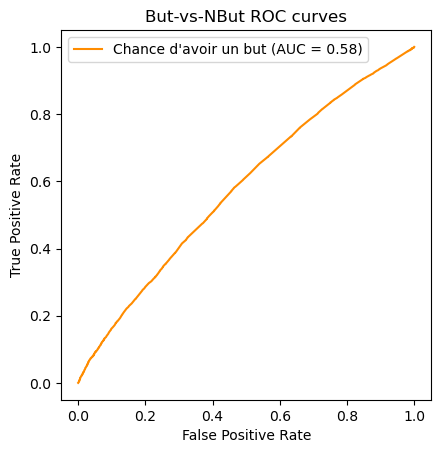

AUC metric : 0.578754708834128


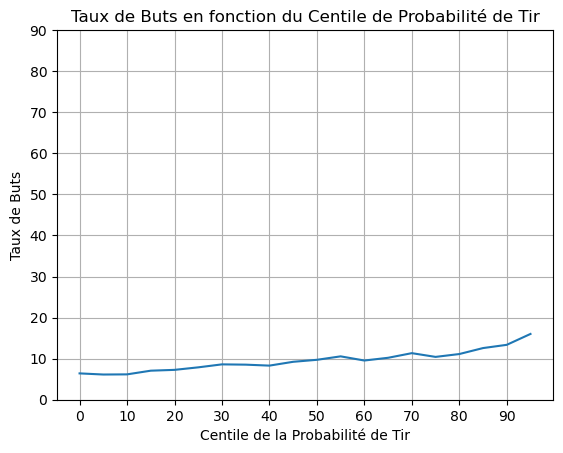

C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
C:\User

ROC AUC Score: 0.5804090003267307


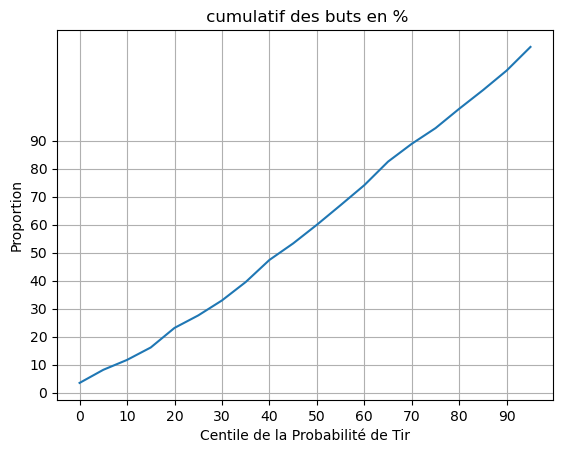

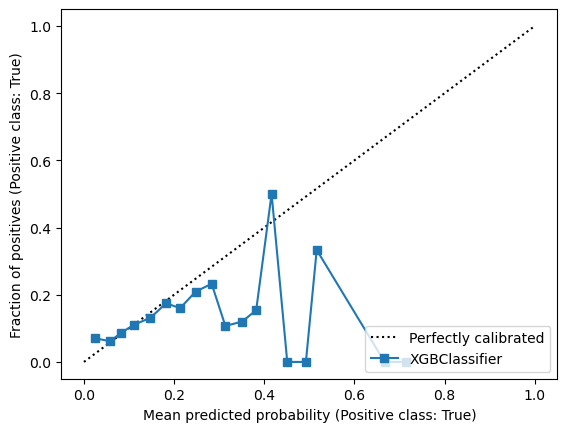

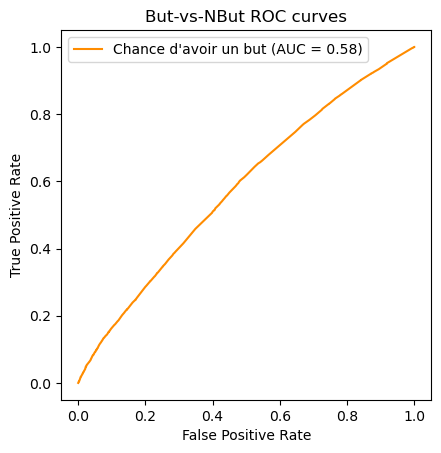

AUC metric : 0.5804090003267307


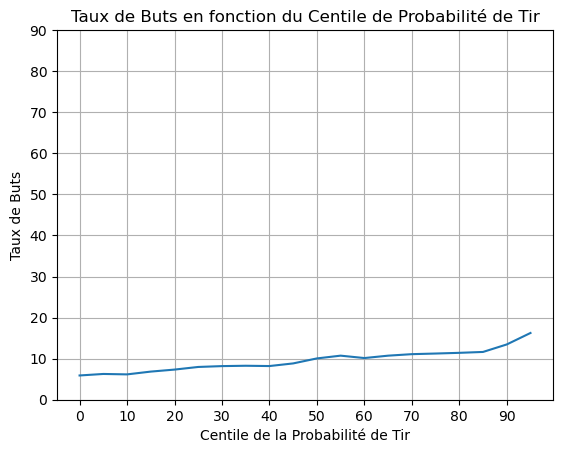

C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\Users\mathi\miniconda3\Lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)


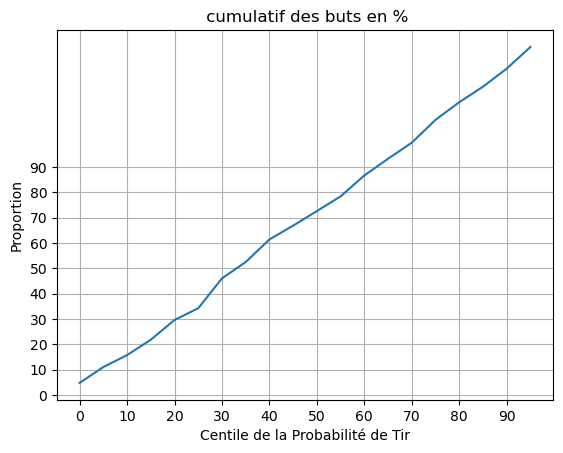

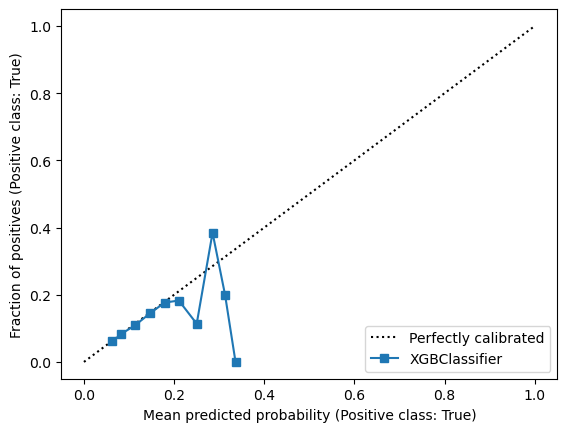

In [9]:
Advanced_model.xgboost()

# Faite votre mieux
Neural Network

In [10]:
current_dir = os.path.abspath(os.getcwd())
parent_dir = os.path.dirname(current_dir)
sys.path.append(os.path.join(parent_dir, 'scripts'))
from scripts import model_nn_clf
from scripts import histGB

In [11]:
model_nn_clf.RunANN()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/me-pic/milestone-2/3b423240e73548279658134f3d21baad
COMET INFO:   Parameters:
COMET INFO:     objective : binary:logistic
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git metadata                 : 1
COMET INFO:     git-patch (uncompressed)     : 1 (2.02 MB)
COMET INFO:     installed packages           : 1
COMET INFO:     notebook                     : 1
COMET INFO:     source_code             

ANNModel(
  (layer_1): Linear(in_features=30, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=96, bias=True)
  (layer_4): Linear(in_features=96, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (236767x36 and 30x64)

In [12]:
histGB.RunHistGB()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/me-pic/milestone-2/89aa507469c34cde89bff8c2fc3cb800
COMET INFO:   Others:
COMET INFO:     Name : ANN
COMET INFO:   Parameters:
COMET INFO:     copy          : True
COMET INFO:     learning_rate : 0.01
COMET INFO:     momentum      : 0.9
COMET INFO:     num_epochs    : 500
COMET INFO:     with_mean     : True
COMET INFO:     with_std      : True
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET INFO:     conda-info                   : 1
COMET INFO:     conda-specification          : 1
COMET INFO:     environment details          : 1
COMET INFO:     filename                     : 1
COMET INFO:     git m

Loading data...


COMET WARNING: truncated string; too long: 'HistGradientBoostingClassifier(categorical_features=['prd', 'noGoalie',
                                                     'rebond',
                                                     'shotCategory_Backhand',
                                                     'shotCategory_Deflected',
                                                     'shotCategory_Slap Shot',
                                                     'shotCategory_Snap Shot',
                                                     'shotCategory_Tip-In',
                                                     'shotCategory_Wrap-around',
                                                     'shotCategory_Wrist Shot',
                                                     'last_event_type_BLOCKED_SHOT',
                                                     'last_event_type_FACEOFF',
                                                     'last_event_type_GIVEAWAY',
                       

Splitting data...
Defining hyperparameters...


ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py", line 233, in _check_categories
    is_categorical[feature_names.index(feature_name)] = True
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: 'prd' is not in list

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py", line 397, in fit
    self.is_categorical_, known_categories = self._check_categories(X)
                                             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mathi\miniconda3\Lib\site-packages\sklearn\ensemble\_hist_gradient_boosting\gradient_boosting.py", line 235, in _check_categories
    raise ValueError(
ValueError: categorical_features has a item value 'prd' which is not a valid feature name of the training data. Observed feature names: ['index', 'coord_x', 'coord_y', 'last_event_x', 'last_event_y', 'time_since_last_event', 'distance_from_last_event', 'power_play_time_elapsed', 'home_team_skater_count', 'away_team_skater_count', 'game_seconds', 'shot_distance', 'shot_angle', 'rebond', 'changement_angle_tir', 'vitesse', 'distance_shot', 'angle_shot', 'is_goal', 'empty_net', 'shotCategory_Backhand', 'shotCategory_Deflected', 'shotCategory_Slap Shot', 'shotCategory_Snap Shot', 'shotCategory_Tip-In', 'shotCategory_Wrap-around', 'shotCategory_Wrist Shot', 'last_event_type_BLOCKED_SHOT', 'last_event_type_FACEOFF', 'last_event_type_GIVEAWAY', 'last_event_type_GOAL', 'last_event_type_HIT', 'last_event_type_MISSED_SHOT', 'last_event_type_PENALTY', 'last_event_type_SHOT', 'last_event_type_TAKEAWAY']
